In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection  import StratifiedShuffleSplit

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from predict_function import predict

from sklearn.base import BaseEstimator, TransformerMixin


class Add_features(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.lon = 0
        self.lat = 1
        self.hma = 2
        self.trms = 3
        self.pop = 5
        self.med_inc = 7

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lat_long = X[:, self.lon] + X[:, self.lat]
        hma_med_inc = X[:, self.hma] / X[:, self.med_inc]
        trms_pop = X[:, self.trms] / X[:, self.pop]

        return np.c_[X, lat_long, hma_med_inc, trms_pop]
        


house = pd.read_csv('../housing.csv')

X = house.drop('median_house_value', axis=1).copy()
y = house.median_house_value


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
(train_idx, test_idx), = split.split(X, X['ocean_proximity'])

X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]


num_features = X.select_dtypes('float').columns
cat_features = X.select_dtypes('object').columns


num_pipline = Pipeline([
    ('impute', SimpleImputer()),
    ('add_feature', Add_features()),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse_output=False))
])


final_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features)
])

final_pipeline.fit(X_train)

X_train_tr = final_pipeline.transform(X_train)
X_test_tr = final_pipeline.transform(X_test)



models = [
    ('Random_forest', RandomForestRegressor(n_jobs=-1)),
    ('sgd', SGDRegressor()),
    ('SVM', SVR()),
    ('k neighbors', KNeighborsRegressor())
]

predict(models, X_train_tr, X_test_tr, y_train, y_test)

Random_forest
Training error: 11001.93
Training accuracy: 0.98
____________________________________________________________________________________________________
Testing error: 29847.91
Testing accuracy: 0.83

sgd
Training error: 49677.88
Training accuracy: 0.65
____________________________________________________________________________________________________
Testing error: 49465.93
Testing accuracy: 0.64

SVM
Training error: 88212.00
Training accuracy: -0.05
____________________________________________________________________________________________________
Testing error: 86533.17
Testing accuracy: -0.04

k neighbors
Training error: 30399.42
Training accuracy: 0.84
____________________________________________________________________________________________________
Testing error: 38091.46
Testing accuracy: 0.74



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection  import StratifiedShuffleSplit

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from predict_function import predict

from sklearn.base import BaseEstimator, TransformerMixin


class Add_features(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.lon = 0
        self.lat = 1
        self.hma = 2
        self.trms = 3
        self.pop = 5
        self.med_inc = 7

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lat_long = X[:, self.lon] + X[:, self.lat]
        hma_med_inc = X[:, self.hma] / X[:, self.med_inc]
        trms_pop = X[:, self.trms] / X[:, self.pop]

        return np.c_[X, lat_long, hma_med_inc, trms_pop]
        


house = pd.read_csv('../housing.csv')

X = house.drop('median_house_value', axis=1).copy()
y = house.median_house_value


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
(train_idx, test_idx), = split.split(X, X['ocean_proximity'])

X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]


num_features = X.select_dtypes('float').columns
cat_features = X.select_dtypes('object').columns


num_pipline = Pipeline([
    ('impute', SimpleImputer()),
    ('add_feature', Add_features()),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse_output=False))
])


final_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features)
])

final_pipeline.fit(X_train)

X_train_tr = final_pipeline.transform(X_train)
X_test_tr = final_pipeline.transform(X_test)



models = [
    ('Random_forest', RandomForestRegressor(n_estimators=500, max_depth=10, n_jobs=-1)),
    ('sgd', SGDRegressor(max_iter=2000)),
    ('SVM', SVR(kernel='linear')),
    ('k neighbors', KNeighborsRegressor(n_neighbors=50))
]

predict(models, X_train_tr, X_test_tr, y_train, y_test)

Random_forest
Training error: 26706.30
Training accuracy: 0.89
____________________________________________________________________________________________________
Testing error: 33062.45
Testing accuracy: 0.81

sgd
Training error: 49645.87
Training accuracy: 0.65
____________________________________________________________________________________________________
Testing error: 49378.16
Testing accuracy: 0.64

SVM
Training error: 78028.74
Training accuracy: 0.14
____________________________________________________________________________________________________
Testing error: 76521.33
Testing accuracy: 0.14

k neighbors
Training error: 39362.86
Training accuracy: 0.75
____________________________________________________________________________________________________
Testing error: 40018.99
Testing accuracy: 0.74



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection  import StratifiedShuffleSplit

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from predict_function import predict

from sklearn.base import BaseEstimator, TransformerMixin


class Add_features(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.lon = 0
        self.lat = 1
        self.hma = 2
        self.trms = 3
        self.pop = 5
        self.med_inc = 7

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lat_long = X[:, self.lon] + X[:, self.lat]
        hma_med_inc = X[:, self.hma] / X[:, self.med_inc]
        trms_pop = X[:, self.trms] / X[:, self.pop]

        return np.c_[X, lat_long, hma_med_inc, trms_pop]
        


house = pd.read_csv('../housing.csv')

X = house.drop('median_house_value', axis=1).copy()
y = house.median_house_value


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
(train_idx, test_idx), = split.split(X, X['ocean_proximity'])

X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]


num_features = X.select_dtypes('float').columns
cat_features = X.select_dtypes('object').columns


num_pipline = Pipeline([
    ('impute', SimpleImputer()),
    ('add_feature', Add_features()),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse_output=False))
])


final_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features)
])

final_pipeline.fit(X_train)

X_train_tr = final_pipeline.transform(X_train)
X_test_tr = final_pipeline.transform(X_test)



In [2]:

models = [
    ('Random_forest', RandomForestRegressor(n_estimators=10, max_depth=2, n_jobs=-1))
]

predict(models, X_train_tr, X_test_tr, y_train, y_test)

Random_forest
Training error: 59201.76
Training accuracy: 0.53
____________________________________________________________________________________________________
Testing error: 59469.47
Testing accuracy: 0.51



In [3]:

models = [
    ('Random_forest', RandomForestRegressor(n_estimators=30, max_depth=3, n_jobs=-1))
]

predict(models, X_train_tr, X_test_tr, y_train, y_test)


Random_forest
Training error: 52156.55
Training accuracy: 0.62
____________________________________________________________________________________________________
Testing error: 51936.06
Testing accuracy: 0.61



In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
param_grid = [
    {
        'n_estimators':[50, 100, 150, 200, 250, 300, 350],
        'max_depth':[2, 4, 6, 8, 10],
        'max_features':[1, 3, 5, 6]
    }
]

In [6]:
forest = RandomForestRegressor(n_jobs=-1)

In [7]:
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='r2',  return_train_score=True)
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'max_features': [1, 3, 5, 6],
                          'n_estimators': [50, 100, 150, 200, 250, 300, 350]}],
             return_train_score=True, scoring='r2')

In [8]:
grid_search.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'max_features': [1, 3, 5, 6],
                          'n_estimators': [50, 100, 150, 200, 250, 300, 350]}],
             return_train_score=True, scoring='r2')

In [11]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=350, n_jobs=-1)

In [12]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 6, 'n_estimators': 350}

In [13]:
grid_search.cv_results_

{'mean_fit_time': array([0.82888236, 0.17555108, 0.23151121, 0.28320551, 0.41678715,
        0.4254385 , 0.53021488, 0.137465  , 0.26735177, 0.32447357,
        0.40078917, 0.48551898, 0.47857566, 0.61436939, 0.12792468,
        0.24414644, 0.32230926, 0.4072886 , 0.54102817, 0.56182947,
        0.7249507 , 0.13867974, 0.25020623, 0.34510622, 0.43853774,
        0.5841012 , 0.60304403, 0.76579561, 0.10833955, 0.21321325,
        0.29876084, 0.32687788, 0.49588776, 0.46074243, 0.57217898,
        0.15139866, 0.27847033, 0.35817647, 0.4339807 , 0.55967946,
        0.59952159, 0.74317641, 0.16437979, 0.33266215, 0.46302462,
        0.55652709, 0.73680582, 0.95579119, 0.98216195, 0.17974105,
        0.34544559, 0.48804312, 0.68760886, 0.81608405, 0.94480414,
        1.13360825, 0.12103429, 0.22231836, 0.29755049, 0.36636534,
        0.48960829, 0.52250619, 0.66277385, 0.15762248, 0.29886489,
        0.4245564 , 0.54864521, 0.77236762, 0.84481273, 0.93908525,
        0.24196434, 0.4407506 ,

In [14]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [15]:
results = grid_search.cv_results_


In [16]:
results['mean_fit_time']

array([0.82888236, 0.17555108, 0.23151121, 0.28320551, 0.41678715,
       0.4254385 , 0.53021488, 0.137465  , 0.26735177, 0.32447357,
       0.40078917, 0.48551898, 0.47857566, 0.61436939, 0.12792468,
       0.24414644, 0.32230926, 0.4072886 , 0.54102817, 0.56182947,
       0.7249507 , 0.13867974, 0.25020623, 0.34510622, 0.43853774,
       0.5841012 , 0.60304403, 0.76579561, 0.10833955, 0.21321325,
       0.29876084, 0.32687788, 0.49588776, 0.46074243, 0.57217898,
       0.15139866, 0.27847033, 0.35817647, 0.4339807 , 0.55967946,
       0.59952159, 0.74317641, 0.16437979, 0.33266215, 0.46302462,
       0.55652709, 0.73680582, 0.95579119, 0.98216195, 0.17974105,
       0.34544559, 0.48804312, 0.68760886, 0.81608405, 0.94480414,
       1.13360825, 0.12103429, 0.22231836, 0.29755049, 0.36636534,
       0.48960829, 0.52250619, 0.66277385, 0.15762248, 0.29886489,
       0.4245564 , 0.54864521, 0.77236762, 0.84481273, 0.93908525,
       0.24196434, 0.4407506 , 0.60083547, 0.79195075, 0.93322

In [17]:
len(results['mean_fit_time'])

140

In [31]:
mean_train_score = np.round(results['mean_train_score'], 2)
mean_train_score

array([0.31, 0.29, 0.29, 0.29, 0.3 , 0.28, 0.29, 0.47, 0.48, 0.48, 0.47,
       0.47, 0.47, 0.48, 0.54, 0.54, 0.53, 0.54, 0.54, 0.54, 0.54, 0.55,
       0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.49, 0.49, 0.49, 0.49, 0.49,
       0.5 , 0.49, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.68, 0.69,
       0.68, 0.68, 0.68, 0.68, 0.68, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69,
       0.69, 0.62, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.74, 0.74, 0.74,
       0.74, 0.74, 0.74, 0.74, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76,
       0.76, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.73, 0.72, 0.73, 0.73,
       0.73, 0.73, 0.73, 0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.82,
       0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83,
       0.83, 0.83, 0.8 , 0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.86, 0.86,
       0.86, 0.87, 0.87, 0.87, 0.87, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88,
       0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88])

In [32]:
mean_test_score = np.round(results['mean_test_score'], 2)
mean_test_score

array([0.31, 0.28, 0.29, 0.29, 0.29, 0.28, 0.29, 0.47, 0.47, 0.47, 0.47,
       0.47, 0.47, 0.47, 0.54, 0.54, 0.53, 0.54, 0.53, 0.54, 0.54, 0.55,
       0.55, 0.54, 0.55, 0.55, 0.55, 0.55, 0.48, 0.48, 0.48, 0.48, 0.48,
       0.49, 0.48, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.67, 0.68,
       0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68,
       0.68, 0.6 , 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.72, 0.72, 0.72,
       0.72, 0.72, 0.72, 0.72, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74,
       0.74, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.69, 0.69, 0.69, 0.69,
       0.69, 0.69, 0.69, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.78,
       0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79,
       0.79, 0.79, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.8 , 0.8 ,
       0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.81, 0.81, 0.81, 0.81, 0.81, 0.81,
       0.81, 0.81, 0.81, 0.82, 0.82, 0.82, 0.81, 0.82])

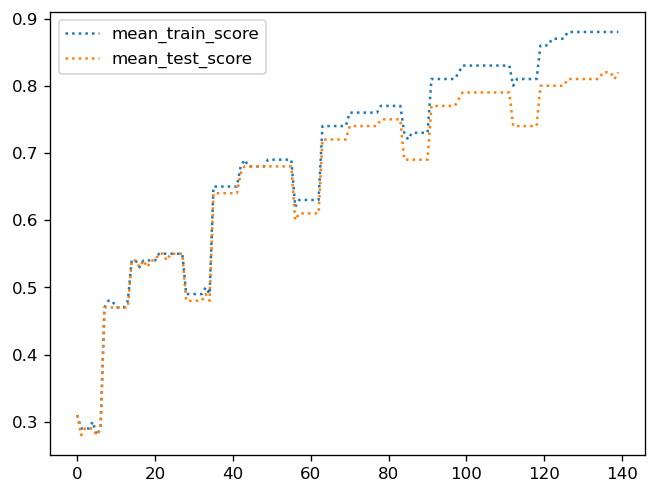

In [33]:
plt.figure(dpi=120)
plt.plot(mean_train_score, ':', label='mean_train_score')
plt.plot(mean_test_score, ':', label='mean_test_score')
plt.legend()
plt.show()

In [34]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 6, 'n_estimators': 350}

In [35]:
results['params']

[{'max_depth': 2, 'max_features': 1, 'n_estimators': 50},
 {'max_depth': 2, 'max_features': 1, 'n_estimators': 100},
 {'max_depth': 2, 'max_features': 1, 'n_estimators': 150},
 {'max_depth': 2, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 2, 'max_features': 1, 'n_estimators': 250},
 {'max_depth': 2, 'max_features': 1, 'n_estimators': 300},
 {'max_depth': 2, 'max_features': 1, 'n_estimators': 350},
 {'max_depth': 2, 'max_features': 3, 'n_estimators': 50},
 {'max_depth': 2, 'max_features': 3, 'n_estimators': 100},
 {'max_depth': 2, 'max_features': 3, 'n_estimators': 150},
 {'max_depth': 2, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': 2, 'max_features': 3, 'n_estimators': 250},
 {'max_depth': 2, 'max_features': 3, 'n_estimators': 300},
 {'max_depth': 2, 'max_features': 3, 'n_estimators': 350},
 {'max_depth': 2, 'max_features': 5, 'n_estimators': 50},
 {'max_depth': 2, 'max_features': 5, 'n_estimators': 100},
 {'max_depth': 2, 'max_features': 5, 'n_estimators': 150},


In [36]:
for i in range(len(mean_test_score)):
    print(f"{mean_train_score[i]}  {mean_test_score[i]}  {results['params'][i]}")
    print()

0.31  0.31  {'max_depth': 2, 'max_features': 1, 'n_estimators': 50}

0.29  0.28  {'max_depth': 2, 'max_features': 1, 'n_estimators': 100}

0.29  0.29  {'max_depth': 2, 'max_features': 1, 'n_estimators': 150}

0.29  0.29  {'max_depth': 2, 'max_features': 1, 'n_estimators': 200}

0.3  0.29  {'max_depth': 2, 'max_features': 1, 'n_estimators': 250}

0.28  0.28  {'max_depth': 2, 'max_features': 1, 'n_estimators': 300}

0.29  0.29  {'max_depth': 2, 'max_features': 1, 'n_estimators': 350}

0.47  0.47  {'max_depth': 2, 'max_features': 3, 'n_estimators': 50}

0.48  0.47  {'max_depth': 2, 'max_features': 3, 'n_estimators': 100}

0.48  0.47  {'max_depth': 2, 'max_features': 3, 'n_estimators': 150}

0.47  0.47  {'max_depth': 2, 'max_features': 3, 'n_estimators': 200}

0.47  0.47  {'max_depth': 2, 'max_features': 3, 'n_estimators': 250}

0.47  0.47  {'max_depth': 2, 'max_features': 3, 'n_estimators': 300}

0.48  0.47  {'max_depth': 2, 'max_features': 3, 'n_estimators': 350}

0.54  0.54  {'max_depth

In [9]:
import pickle

In [37]:
with open('grid_search.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

In [20]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=300, n_jobs=-1)

In [21]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 6, 'n_estimators': 300}

In [22]:
grid_search.cv

5

In [23]:
grid_search.cv_results_

{'mean_fit_time': array([0.72941966, 0.19284501, 0.24605422, 0.29697094, 0.45099173,
        0.38393354, 0.48809032, 0.10372357, 0.20132999, 0.2785151 ,
        0.33221045, 0.46823907, 0.45528483, 0.6097311 , 0.13469   ,
        0.24403877, 0.32563806, 0.40573573, 0.56911125, 0.56444468,
        0.68782244, 0.12016206, 0.24391747, 0.31875844, 0.39906754,
        0.53679433, 0.55848308, 0.70023327, 0.10529413, 0.20698566,
        0.26295567, 0.32201309, 0.45011525, 0.43045287, 0.552566  ,
        0.12369132, 0.23716459, 0.3221755 , 0.40781007, 0.54125609,
        0.57356772, 0.70626755, 0.14820504, 0.28794041, 0.40564485,
        0.51620526, 0.73531461, 0.74606075, 0.89773264, 0.16022563,
        0.31240463, 0.43690481, 0.5690033 , 0.73415484, 0.83917565,
        0.98518968, 0.10942974, 0.21375237, 0.28445187, 0.35544133,
        0.48500438, 0.47399325, 0.60741715, 0.14698114, 0.27259049,
        0.3884738 , 0.49437747, 0.63383665, 0.70851269, 0.84993324,
        0.18547306, 0.35550108,

In [24]:
7 * 5 * 4

140

In [25]:
results = grid_search.cv_results_
results

{'mean_fit_time': array([0.72941966, 0.19284501, 0.24605422, 0.29697094, 0.45099173,
        0.38393354, 0.48809032, 0.10372357, 0.20132999, 0.2785151 ,
        0.33221045, 0.46823907, 0.45528483, 0.6097311 , 0.13469   ,
        0.24403877, 0.32563806, 0.40573573, 0.56911125, 0.56444468,
        0.68782244, 0.12016206, 0.24391747, 0.31875844, 0.39906754,
        0.53679433, 0.55848308, 0.70023327, 0.10529413, 0.20698566,
        0.26295567, 0.32201309, 0.45011525, 0.43045287, 0.552566  ,
        0.12369132, 0.23716459, 0.3221755 , 0.40781007, 0.54125609,
        0.57356772, 0.70626755, 0.14820504, 0.28794041, 0.40564485,
        0.51620526, 0.73531461, 0.74606075, 0.89773264, 0.16022563,
        0.31240463, 0.43690481, 0.5690033 , 0.73415484, 0.83917565,
        0.98518968, 0.10942974, 0.21375237, 0.28445187, 0.35544133,
        0.48500438, 0.47399325, 0.60741715, 0.14698114, 0.27259049,
        0.3884738 , 0.49437747, 0.63383665, 0.70851269, 0.84993324,
        0.18547306, 0.35550108,

In [27]:
results['mean_fit_time'].size

140

In [28]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])